<a href="https://colab.research.google.com/github/EduardoFoncescaFinardi/DA_IA_IOT/blob/main/Praticando_redes_neurais_com_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalhando com Redes Neurais com TensorFlow

Neste módulo, exploraremos os fundamentos das redes neurais e aprenderemos a aplicar esses conceitos poderosos usando a biblioteca TensorFlow. O TensorFlow não apenas facilita a construção e o treinamento de modelos complexos, mas também oferece ferramentas robustas para o processamento de dados, essenciais para qualquer projeto de machine learning.

### Objetivos de Aprendizado

- Entender o funcionamento das redes neurais.
- Desenvolver habilidades práticas em modelagem e treinamento de redes neurais com TensorFlow.
- Aplicar redes neurais em problemas reais de classificação e regressão.

### Desafios a Serem Explorados

1. **Problema de Regressão**
   - **Contexto**: Utilizaremos um conjunto de dados com o desafio enfrentado pelos planos de saúde na estimativa de gastos por segurado.
   - **Modelo Sugerido**: Rede neural com múltiplas camadas densas.
   - **Métricas de Avaliação**: RMSE (Root Mean Square Error) e R2-score para quantificar a diferença entre os valores preditos e os reais.

2. **Problema de Classificação**
   - **Contexto**: otimizar processos de RH.Onde o objetivo é prever se um colaborador irá deixar a empresa ou não.
   - **Modelo Sugerido**: Rede neural scom múltiplas camadas densas para classificação multiclasse.
   - **Métricas de Avaliação**: Acurácia e matriz de confusão para avaliar o desempenho do modelo.

### Pré-processamento e Tratamento de Dados

Antes de aplicar o treinamento de modelos, é essencial realizar o pré-processamento e o tratamento adequado dos dados. Esse processo inclui:

- **Limpeza de Dados**: Remoção de valores ausentes ou correção de dados corrompidos.
- **Normalização/Padronização**: Escalonamento dos valores numéricos para que o modelo não seja enviesado por características com escalas grandes.
- **Codificação de Variáveis Categóricas**: Transformação de variáveis categóricas em formatos numéricos que podem ser interpretados pelo modelo, como one-hot encoding.

Vamos começar!!!


# **Problema de Regressão**

Nosso problema é o desafio enfrentado pelos planos de saúde na estimativa de gastos por segurado.

Poder estimar este valor permite uma melhor alocação de recursos e uma gestão mais eficiente dos custos operacionais.

Do ponto de vista prático, utilizaremos uma base bastante conhecida contendo informações sobre os segurados (como idade, gênero, região de residência, entre outros).

Esses atributos são comumente usados para prever os custos médicos de um segurado, o que pode ser útil para companhias de seguros na precificação de apólices ou na identificação de segmentos de clientes com diferentes perfis de risco.


Esta base é composta pelos seguintes atributos:

- age: Refere-se à idade do segurado, representada em anos.
- sex: Indica o sexo do segurado, podendo ser 'male' ou 'female'.
- bmi: Corresponde ao Índice de Massa Corporal (IMC) do segurado, uma medida que relaciona o peso e a altura da pessoa, geralmente expressa em kg/m².
- children: Representa o número de filhos ou dependentes do segurado.
- smoker: Indica se o segurado é fumante ou não, podendo ser 'yes' ou 'no'.
-  region: Refere-se à região de residência do segurado, podendo ser 'northeast', 'northwest', 'southeast' ou 'southwest'.
- expenses: Corresponde aos custos médicos do segurado, em dólares.

In [1]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Import de modelo preditivo de regressão para comparar os resultados no final.
from sklearn.linear_model import LinearRegression

# Import de métricas para avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Leitura do dataset
df = pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# Quais os tipos? Dados faltantes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
## note que temos que tratar os atributos 'sex', 'smoker' e 'region'

In [5]:
# Quantos dados únicos
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [10]:
# Removendo duplicatas
df.drop_duplicates(inplace=True)
df.shape

# note que existia 1 dado duplicado

(1337, 9)

Agora já podemos partir para a limpeza da base, convertendo strings para números, aplicando OneHotEncoder e eliminando colunas originais que já foram tratadas

In [11]:
# Convertendo dados "string" para "números"
df["genero"] = df["sex"].apply( lambda x: 0 if x == "male" else 1 )
df["fumante"] = df["smoker"].apply( lambda x: 1 if x == "yes" else 0 )

# OneHotEncoder da coluna "region"
aux = pd.get_dummies(df["region"], drop_first=True)
df_final = pd.concat([df, aux], axis=1)

# Remover colunas que já foram processadas
df_final.drop(columns=["sex", "smoker", "region"], inplace=True)
df_final

,age,bmi,children,expenses,genero,fumante,northwest,southeast,southwest
0,19,27.9,0,16884.92,1,1,False,False,True
1,18,33.8,1,1725.55,0,0,False,True,False
2,28,33.0,3,4449.46,0,0,False,True,False
3,33,22.7,0,21984.47,0,0,True,False,False
4,32,28.9,0,3866.86,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,0,True,False,False
1334,18,31.9,0,2205.98,1,0,False,False,False
1335,18,36.9,0,1629.83,1,0,False,True,False
1336,21,25.8,0,2007.95,1,0,False,False,True


### Preste atenção


O nosso atributo alvo é `expenses` que caracteriza o valor gasto.


Os outros atributos são possiveis entradas de dados.


**Nosso objetivo é praticar redes neurais, por essa razão e apenas por isso, vamos simplificar a análise e considerar todas outras colunas como entradas de dados. Em outros casos, é necessário realizar uma exploração de dados mais profunda.**


In [12]:
# Separação de DADOS e LABEL
X = df_final.drop(columns=["expenses"])
y = df_final["expenses"]

# Dividindo dados para TREINO e TESTE
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [13]:
X_train, X_train_scaled

(      age   bmi  children  genero  fumante  northwest  southeast  southwest
 138    54  31.9         3       1        0      False       True      False
 381    55  30.7         0       0        1      False      False      False
 292    25  45.5         2       0        1      False       True      False
 1090   47  36.2         0       0        1      False       True      False
 893    47  38.9         2       0        1      False       True      False
 ...   ...   ...       ...     ...      ...        ...        ...        ...
 1096   51  35.0         2       1        1      False      False      False
 1131   27  45.9         2       0        0      False      False       True
 1295   20  22.0         1       0        0      False      False       True
 861    38  28.0         3       1        0      False      False       True
 1127   35  35.9         2       1        0      False       True      False
 
 [935 rows x 8 columns],
 array([[ 1.07135822,  0.21232198,  1.59987002, .

Agora vamos treinar nossos dados, vamos fazer dois modelos:

1.   modelo de regressão linear simples.
2.   modelo de rede neural

Ao final, vamos compara os resultados.


In [14]:
# funçao para facilitar o calculo das métricas

def metricas(X_tr_scaled, y_tr, y_ts, y_pr, model, id_modelo):
  y_pr_tr = model.predict(X_tr_scaled)

  # Erro quadrático médio
  print(f"MSE do TREINO ({id_modelo}): ", mean_squared_error(y_tr, y_pr_tr))
  print(f"MSE do TESTE  ({id_modelo}): ", mean_squared_error(y_ts, y_pr))

  # Erro absoluto médio
  print(f"MAE do TREINO ({id_modelo}): ", mean_absolute_error(y_tr, y_pr_tr))
  print(f"MAE do TESTE  ({id_modelo}): ", mean_absolute_error(y_ts, y_pr))

  # R²
  print(f"R² do TREINO ({id_modelo}): ", r2_score(y_tr, y_pr_tr))
  print(f"R² do TESTE  ({id_modelo}): ", r2_score(y_ts, y_pr))

In [15]:
# Treinando o modelo usando sklearn
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Fazendo as predições
y_pred = model_lr.predict(X_test_scaled)

In [17]:
# Metricas para regressão linear
metricas(X_train_scaled, y_train, y_test, y_pred, model_lr, "Reg Linear")

MSE do TREINO (Reg Linear):  35810116.96256572
MSE do TESTE  (Reg Linear):  38939165.63000257
MAE do TREINO (Reg Linear):  4165.7883312974745
MAE do TESTE  (Reg Linear):  4181.631594223737
R² do TREINO (Reg Linear):  0.7362844577541661
R² do TESTE  (Reg Linear):  0.772442225318259


#### até aqui não existe nenhum novidade, ou pelo menos não deveria...

A novidade vem agora, onde vamos implementar um modelo de rede neural com Tensorflow

Vamos seguir os seguintes passos:

- criar o modelo de rede neural
- compilar o modelo
- treinar o modelo






In [26]:
import tensorflow as tf

# Cria o modelo de rede neural
# aqui devemos definir ao menos a quantidade de camadas, a quantidade de neuronios, o tipo de ativacao ...
model_rn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu',),
    tf.keras.layers.Dense(1)
])

# Compila o modelo
model_rn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Treina o modelo
historico_epochs = model_rn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Fazendo as predições
y_pr = model_rn.predict(X_test_scaled)

Epoch 1/100
24/24 [==============================] - 2s 20ms/step - loss: 307989536.0000 - mae: 13180.4053 - val_loss: 296366048.0000 - val_mae: 12446.8672
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 307888000.0000 - mae: 13176.8223 - val_loss: 296229760.0000 - val_mae: 12441.9395
Epoch 3/100
24/24 [==============================] - 0s 9ms/step - loss: 307668096.0000 - mae: 13169.6709 - val_loss: 295941312.0000 - val_mae: 12432.1230
Epoch 4/100
24/24 [==============================] - 0s 12ms/step - loss: 307219200.0000 - mae: 13155.6377 - val_loss: 295384416.0000 - val_mae: 12414.0732
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 306392640.0000 - mae: 13130.7607 - val_loss: 294394272.0000 - val_mae: 12383.3662
Epoch 6/100
24/24 [==============================] - 0s 15ms/step - loss: 305023552.0000 - mae: 13090.4609 - val_loss: 292814880.0000 - val_mae: 12336.3125
Epoch 7/100
24/24 [==============================] - 0s 6ms/step -

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      100 non-null    float64
 1   mae       100 non-null    float64
 2   val_loss  100 non-null    float64
 3   val_mae   100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


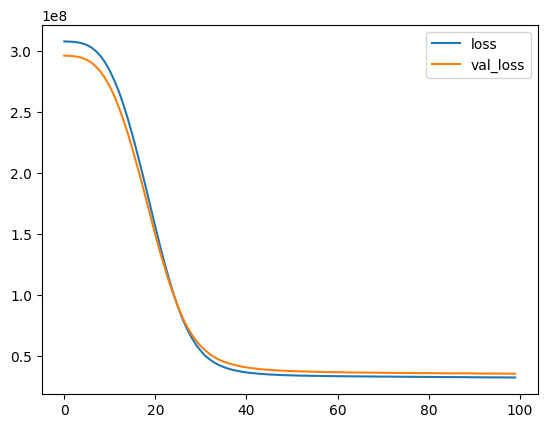

In [27]:
df_historico = pd.DataFrame(historico_epochs.history)
df_historico.info()

df_historico[['loss','val_loss']].plot()
plt.show();


In [28]:
# Metricas para regressão linear
metricas(X_train_scaled, y_train, y_test, y_pr, model_rn, "rede neural")

30/30 [==============================] - 0s 1ms/step
MSE do TREINO (rede neural):  32641186.43786511
MSE do TESTE  (rede neural):  36222797.40481955
MAE do TREINO (rede neural):  3955.942469162558
MAE do TESTE  (rede neural):  3977.8421123265507
R² do TREINO (rede neural):  0.7596213329878995
R² do TESTE  (rede neural):  0.7883164922301974


## Desafio

otimize o treinamento do modelo alterando a quantidade de camadas, a quantidade de neuronios, o tipo de ativacao ...

## Desafio

Aplicação em Marketing

As análises preditivas têm uma variedade de aplicações no marketing, ajudando as empresas a entenderem o comportamento do consumidor, otimizar estratégias de vendas e melhorar o retorno sobre o investimento em publicidade.
O potencial das aplicações é vasto, incluindo, mas não se limitando, a previsão de demanda, segmentação de mercado, recomendação de produtos e otimização de preços.
As aplicações listadas podem ser tratadas como problemas supervisionados, não supervisionados e até mesmo análises estatísticas clássicas. Tudo depende do objetivo principal da demanda.


### Definição do problema e dos dados

Nosso case tem como objetivo representar o impacto dos investimentos em publicidade nos resultados de vendas de um produto ou serviço. Esse problema é relevante no marketing porque as empresas precisam entender como a alocação de recursos em diferentes canais de publicidade afeta suas vendas, para otimizar suas estratégias de marketing e maximizar o retorno sobre o investimento.


Para esta modelagem utilizaremos outra base de dados clássica. As variáveis que a compõem são:
- TV: Valor gasto em publicidade na televisão.
- Radio: Valor gasto em publicidade no rádio.
- Newspaper: Valor gasto em publicidade em jornais.
- Sales: Número de vendas do produto ou serviço.

Essas variáveis representam os diferentes canais de publicidade e as vendas associadas àquela alocação, permitindo que os analistas e profissionais de marketing avaliem o impacto de cada canal nas vendas totais.



In [37]:
# Lendo o dataset
df_ad = pd.read_csv("Advertising.csv")
df_ad.head(10)

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [38]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [39]:
df_ad.nunique()

ID           200
TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [41]:
df_ad.drop_duplicates(inplace=True)
df_ad.shape

(200, 5)

In [45]:
_# Separação de DADOS e LABEL
X = df_ad.drop(columns=["ID", "Sales"])
y = df_ad["Sales"]

# Dividindo dados para TREINO e TESTE
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [46]:
X_train, X_train_scaled

(        TV  Radio  Newspaper
 169  284.3   10.6        6.4
 97   184.9   21.0       22.0
 31   112.9   17.4       38.6
 12    23.8   35.1       65.9
 35   290.7    4.1        8.5
 ..     ...    ...        ...
 106   25.0   11.0       29.7
 14   204.1   32.9       46.0
 92   217.7   33.5       59.0
 179  165.6   10.0       17.6
 102  280.2   10.1       21.4
 
 [140 rows x 3 columns],
 array([[ 1.53003874e+00, -8.86292904e-01, -1.16598019e+00],
        [ 3.41038651e-01, -1.73144262e-01, -4.09601321e-01],
        [-5.20208901e-01, -4.20003407e-01,  3.95263370e-01],
        [-1.58600275e+00,  7.93720724e-01,  1.71892638e+00],
        [ 1.60659408e+00, -1.33201081e+00, -1.06415995e+00],
        [-1.63863454e+00, -5.16004186e-01, -3.95055573e-01],
        [ 1.64128322e+00,  2.86288037e-01, -1.38901498e+00],
        [-1.64700778e+00, -7.83434927e-01, -3.41721166e-01],
        [-2.64226989e-01, -1.27715322e+00, -1.02537129e+00],
        [-1.56447156e+00,  1.06115147e+00, -1.02537129e+00],
   

In [47]:
# funçao para facilitar o calculo das métricas

def metricas(X_tr_scaled, y_tr, y_ts, y_pr, model, id_modelo):
  y_pr_tr = model.predict(X_tr_scaled)

  # Erro quadrático médio
  print(f"MSE do TREINO ({id_modelo}): ", mean_squared_error(y_tr, y_pr_tr))
  print(f"MSE do TESTE  ({id_modelo}): ", mean_squared_error(y_ts, y_pr))

  # Erro absoluto médio
  print(f"MAE do TREINO ({id_modelo}): ", mean_absolute_error(y_tr, y_pr_tr))
  print(f"MAE do TESTE  ({id_modelo}): ", mean_absolute_error(y_ts, y_pr))

  # R²
  print(f"R² do TREINO ({id_modelo}): ", r2_score(y_tr, y_pr_tr))
  print(f"R² do TESTE  ({id_modelo}): ", r2_score(y_ts, y_pr))

In [48]:
# Treinando o modelo usando sklearn
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Fazendo as predições
y_pred = model_lr.predict(X_test_scaled)

In [49]:
# Metricas para regressão linear
metricas(X_train_scaled, y_train, y_test, y_pred, model_lr, "Reg Linear")

MSE do TREINO (Reg Linear):  2.4793551789057866
MSE do TESTE  (Reg Linear):  3.79679723671522
MAE do TREINO (Reg Linear):  1.158150294807253
MAE do TESTE  (Reg Linear):  1.5116692224549084
R² do TREINO (Reg Linear):  0.9055159502227753
R² do TESTE  (Reg Linear):  0.8609466508230368


In [63]:
import tensorflow as tf

# Cria o modelo de rede neural
# aqui devemos definir ao menos a quantidade de camadas, a quantidade de neuronios, o tipo de ativacao ...
model_rn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(248, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu',),
    tf.keras.layers.Dense(32, activation='relu',),
    tf.keras.layers.Dense(1)
])

# Compila o modelo
model_rn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Treina o modelo
historico_epochs = model_rn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Fazendo as predições
y_pr = model_rn.predict(X_test_scaled)

Epoch 1/100
4/4 [==============================] - 2s 114ms/step - loss: 244.5927 - mae: 14.7636 - val_loss: 192.4223 - val_mae: 13.1084
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 234.4611 - mae: 14.4247 - val_loss: 184.3742 - val_mae: 12.7947
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 224.1057 - mae: 14.0657 - val_loss: 174.9362 - val_mae: 12.4130
Epoch 4/100
4/4 [==============================] - 0s 30ms/step - loss: 211.5562 - mae: 13.6085 - val_loss: 163.4558 - val_mae: 11.9538
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 196.0473 - mae: 13.0328 - val_loss: 149.5139 - val_mae: 11.4047
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 176.9692 - mae: 12.2968 - val_loss: 132.5032 - val_mae: 10.6904
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 154.2269 - mae: 11.3592 - val_loss: 112.0455 - val_mae: 9.7553
Epoch 8/100
4/4 [==============================]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      100 non-null    float64
 1   mae       100 non-null    float64
 2   val_loss  100 non-null    float64
 3   val_mae   100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


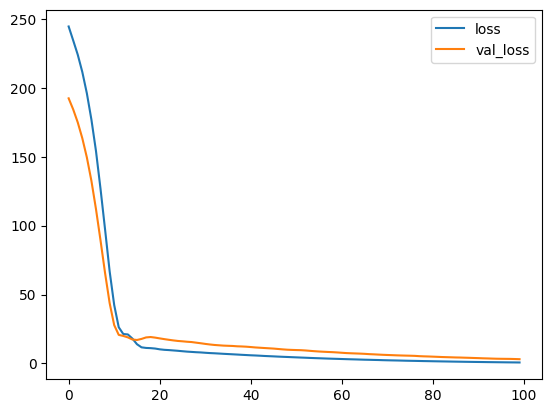

In [64]:
df_historico = pd.DataFrame(historico_epochs.history)
df_historico.info()

df_historico[['loss','val_loss']].plot()
plt.show();


In [65]:
# Metricas para regressão linear
metricas(X_train_scaled, y_train, y_test, y_pr, model_rn, "rede neural")

5/5 [==============================] - 0s 3ms/step
MSE do TREINO (rede neural):  1.106939750476415
MSE do TESTE  (rede neural):  2.4726251815113724
MAE do TREINO (rede neural):  0.656907903126308
MAE do TESTE  (rede neural):  1.0622958421707154
R² do TREINO (rede neural):  0.9578163905783922
R² do TESTE  (rede neural):  0.9094429353709936


# **Problema de Classificação**

Definição do problema e dos dados

O problema em questão é de classificação binária, onde o objetivo é prever se um colaborador irá deixar a empresa ou não. Essa previsão é útil para o departamento de recursos humanos, pois permite identificar antecipadamente os funcionários com maior probabilidade de sair, possibilitando a implementação de medidas preventivas para retenção de talentos.

As variáveis que compõem a base e suas respectivas descrições são:

- satisfaction_level: Nível de satisfação do colaborador com o trabalho, geralmente medido através de pesquisas de satisfação ou avaliações internas.
- last_evaluation: Última avaliação de desempenho do colaborador, que pode ser realizada periodicamente pela empresa para acompanhar o progresso e a performance.
- number_project: Número de projetos em que o colaborador está atualmente envolvido, fornecendo uma medida da carga de trabalho e da diversidade de responsabilidades.
- average_montly_hours: Média de horas trabalhadas por mês pelo colaborador, um indicador do seu nível de envolvimento e dedicação ao trabalho.
- time_spend_company: Tempo de permanência do colaborador na empresa, em anos, que pode influenciar sua propensão a deixar a organização.
- Work_accident: Indicador binário que representa se o colaborador sofreu algum acidente de trabalho durante seu período na empresa.
- left: Variável de destino binária que indica se o colaborador deixou a empresa (1) ou permaneceu (0).
- promotion_last_5years: Indica se o colaborador recebeu alguma promoção nos últimos cinco anos, o que pode influenciar sua satisfação e lealdade.
- sales: Departamento em que o colaborador trabalha, fornecendo informações sobre a área de atuação e a equipe em que está inserido.
- salary: Nível salarial do colaborador, que pode ser classificado em baixo, médio ou alto, oferecendo uma indicação do seu status e remuneração na empresa.

In [ ]:
# Carregando o dataset
data = pd.read_csv('turnover.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Removendo duplicatas
data.drop_duplicates(inplace=True)

# Criando o LabelEncoder
le = LabelEncoder()

# Convertendo strings em números
data['salary'] = le.fit_transform(data['salary'])
data['sales'] = le.fit_transform(data['sales'])

In [ ]:
# Separando features do label
X = data.drop(columns=["left"])
y = data["left"]

# Dividindo os dados em TREINO e TESTE
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Modelo baseline: regressão logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Calcula a acurácia da predição
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("ACC (regressão logística):", accuracy_logreg)

ACC (regressão logística): 0.8315730961645359


Dense(1, activation='sigmoid'): Esta configuração na última camada utiliza a função de ativação 'sigmoid' para produzir uma probabilidade como saída.

loss='binary_crossentropy': Essa função de perda é adequada para problemas de classificação binária, onde as classes são mutuamente exclusivas.

metrics=['accuracy']: A acurácia é uma métrica útil para avaliação em tarefas de classificação, indicando a porcentagem de classificações corretas.

In [ ]:
import tensorflow as tf

# Cria o modelo de rede neural
# aqui devemos definir ao menos a quantidade de camadas, a quantidade de neuronios, o tipo de ativacao ...
model_rn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compila o modelo para classificação binária
model_rn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treina o modelo
historico_epochs = model_rn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


# Fazendo as predições
y_pr = model_rn.predict(X_test_scaled)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loss          100 non-null    float64
 1   accuracy      100 non-null    float64
 2   val_loss      100 non-null    float64
 3   val_accuracy  100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


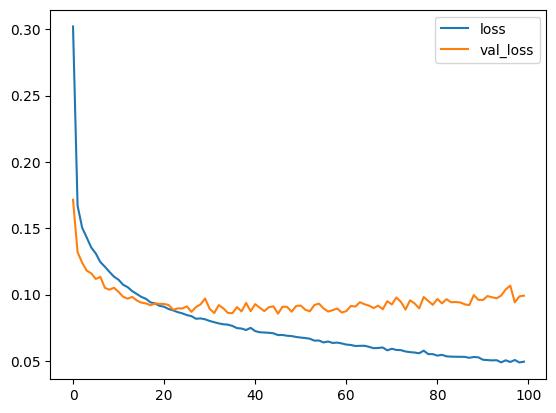

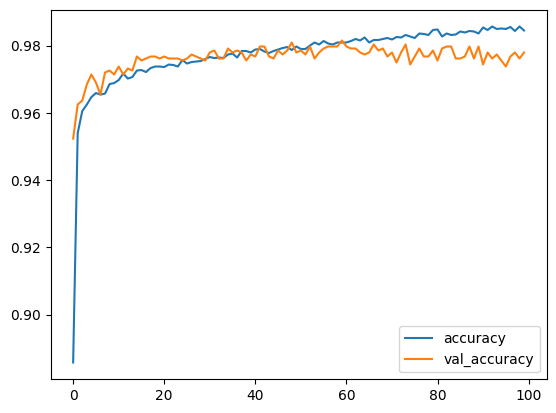

In [ ]:
df_historico = pd.DataFrame(historico_epochs.history)
df_historico.info()

df_historico[['loss','val_loss']].plot()
plt.show();

df_historico[['accuracy','val_accuracy']].plot()
plt.show();

In [ ]:
# 'y_pr' são as probabilidades previstas pelo seu modelo de forma binaria
y_pred_binario = (y_pr > 0.5).astype(int)

# Calcula a acurácia
accuracy_rn = accuracy_score(y_test, y_pred_binario)
print("Accuracy:", accuracy_rn)

Accuracy: 0.9727626459143969


### Desafio

otimize o modelo

In [ ]:
### seu código...